PCA, Nearest-Neighbors Classification and Clustering
====================================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This tour details [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (dimentionality reduction), supervised classification using nearest neighbors
and unsupervised [clustering](https://en.wikipedia.org/wiki/Unsupervised_learning) using [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering).


We recommend that after doing this Numerical Tours, you apply it to your
own data, for instance using a dataset from [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).


_Disclaimer:_ these machine learning tours are intended to be
overly-simplistic implementations and applications of baseline machine learning methods.
For more advanced uses and implementations, we recommend
to use a state-of-the-art library, the most well known being
[Scikit-Learn](http://scikit-learn.org/).

In [1]:
using PyPlot
using NtToolBox

Dataset Loading
---------------
We use here the famous
[IRIS dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) of Fisher.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
 Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Load the dataset.

In [2]:
A = readdlm("iris_dataset.csv", ',');

Randomly permute it.

In [3]:
A = A[randperm(size(A,1)),:];

Separate the features $ (x_i)_{i=1}^n $from the class information.
The feature are stored as the row of a matrix $X \in \RR^{n \times p}$
Be sure to start the class at index 1.

In [4]:
X = A[:,1:end-1]
y = Int.(A[:,end])
y = y-minimum(y)+1;

$n$ is the number of samples, $p$ is the dimensionality of the features,
$k$ is the number of classes.

In [5]:
n,p = size(X)
k = maximum(y);

Dimensionality Reduction and PCA
-------------------------------
In order to display in 2-D or 3-D the data, [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)
is needed.
The simplest method is the [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA),
which perform an
orthogonal linear projection on the principal axsis (eigenvector) of the
covariance matrix.


Compute [empirical mean](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)
$$    m = \frac{1}{n} \sum_{i=1}^n x_i \in \RR^p $$
and [covariance](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)
$$ C = \frac{1}{n} \sum_{i=1}^n (x_i-m) (x_i-m)^\top \in \RR^{p \times p}. $$
Denoting $\tilde X = X - 1_p m^\top $, one has $C=\tilde X^\top
\tilde X$.

In [6]:
Xm = X -> X-repeat(mean(X,1), outer=(size(X,1), 1))
Cov = X -> Xm(X)'*Xm(X);

Display the covariance matrix.

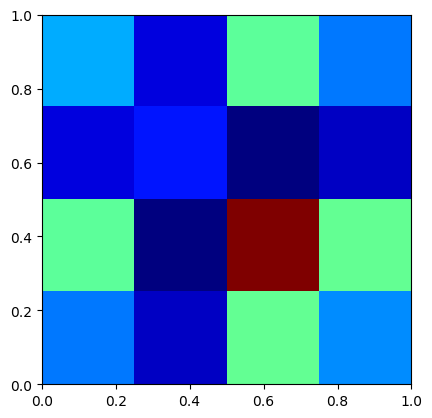

In [7]:
imshow(Cov(X), extent=[0, 1, 0, 1], cmap = get_cmap("jet"));

Compute PCA ortho-basis using the
[SVD decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)
$$ \tilde X = U \text{diag}(d) V  $$
where $U \in \RR^{n \times p}$ and $V \in \RR^{p \times p}$ have
orthonormal columns. $V$ are the principal directions of variance
 and
are order by decreasing variances.

In [8]:
U,D,V = svd(Xm(X),thin=true);

Compute the feature in the PCA basis, $z_i=V^\top (x_i-m) $, stored in matrix
format as $Z=\tilde X V$.

In [9]:
Z = Xm(X) * V;

Plot the singular values of the covariances, which corresponds to the standard deviation of the data
along the principal directions.

In [10]:
length(D)

4

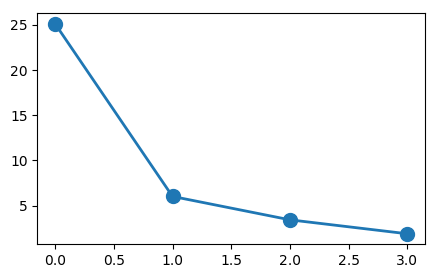

In [11]:
figure(figsize = (5,3))
plot(D, ".-", linewidth= 2, markersize= 20); 

The first dimensions of the $z_i$ are the optimal way to linearly
embed the data in a low dimensional space.
This can be used for display in 2-D using the first two dimension.

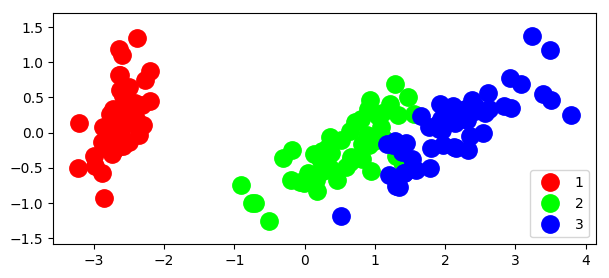

In [12]:
figure(figsize=(7,3))
col = [ [1 0 0]; [0 1 0]; [0 0 1]; [0 0 0]; [0 1 1]; [1 0 1]; [1 1 0]; 
    [1 .5 .5]; [.5 1 .5]; [.5 .5 1]  ]';
ms = 25;
lgd = [];
for i=1:min(k,size(col,2))
    I = find(y.==i)
    plot(Z[I,1], Z[I,2], ".", markersize= ms, c=col[:,Int(i)], markersize=ms, label=i);
    append!(lgd,i);
end
axis("tight"); axis("equal"); box("on");
legend();

Similar display in 3-D.

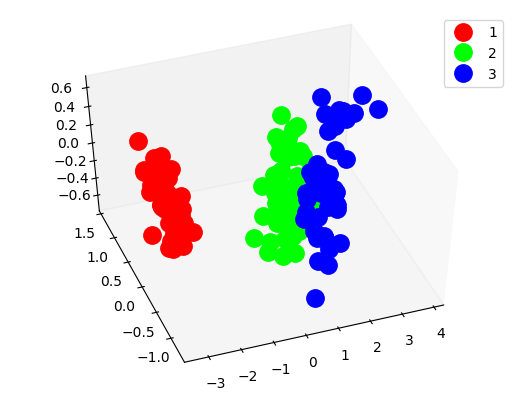

In [13]:
#figure(figsize=(10,5))
for i=1:k
    I = find(y.==i)
    plot3D(Z[I,1], Z[I,2], Z[I,3], ".", c=col[:,Int(i)], markersize=ms, label=Int(i))
end
gca()[:view_init](50, 250)
axis("equal"); axis("tight"); gca()[:grid](false);
legend(loc="best");

Supervised Learning: Nearest Neighbor Classification
----------------------------------------------------
Probably the simplest method for supervised classification is [Nearest
Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ($R$-NN), where $R$ is a parameter indexing the number of neighbor.
Increasing $R$ is important to cope with noise and obtain smoother
decision boundary, and hence better generalization performance.


The class predicted for a point $x$ is the one which is the most
represented among the $R$ points $(x_i)_i$ which are the closed to
$x$.



Split into training and testing.

In [14]:
n0 = Int(round(.5*n)); n1 = n-n0
X0 = X[1:n0,:];     y0 = y[1:n0]
X1 = X[n0+1:end,:]; y1 = y[n0+1:end];

Macro to compute pairwise squared Euclidean distance matrix.

In [15]:
distmat = (X,Z) -> broadcast(+,sum(X'.*X',1)',sum(Z'.*Z',1))-2*(X*Z');

Compute Euclidean distance between some $x$
and all other $x_{1,j}$ in the training set.

In [16]:
i = 1; x = X1[i,:]';  # could be any point
D = distmat(X0,x);

Sort the distance and generate the list of sorted classes $ y_\sigma = (y_{\si(i)})_i$. This
generate an indexing $\si$ (a permutation of $\{1,\ldots,n\}$) such that
$$ \norm{x-x_{\si(1)}} \leq \norm{x-x_{\si(2)}} \leq \ldots \leq \norm{x-x_{\si(n)}}. $$

In [17]:
I = sortperm(D[:])
ys = Int.(y[I]);

For a given $R$, one can compute the histogram of class apparition
$$ h_\ell \eqdef \frac{1}{R} \enscond{ i }{ \si(i) \in \{1,\ldots,R\} }
  = \sharp \si^{-1}( \{1,\ldots,R\} ). $$
The decision class for $x$ is then the maximum of the histogram
$$ c(x) \eqdef \text{argmax}_{\ell} h_\ell $$

In [18]:
function custom_hist(h)
    return [sum(h .== i) for i in 1:k]
end

custom_hist (generic function with 1 method)

In [19]:
R = 5
h = custom_hist(ys[1:R,:])
h = h / R
c = indmax(h);
print("c(x)=",c," [true class=",Int(y1[i]), "]\n");

c(x)=2 [true class=2]


Display the histigram $(h_\ell)_\ell$ of reparttion of class indexes as $R$ grows.

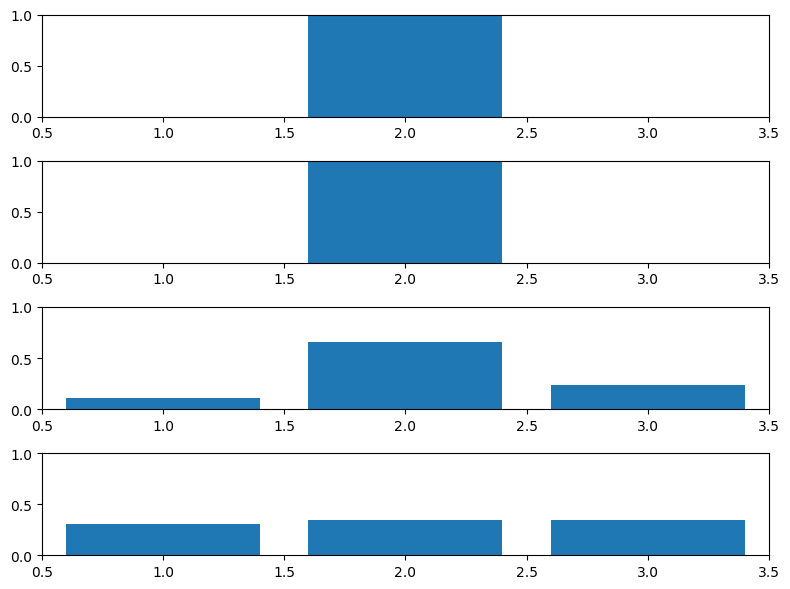

In [20]:
figure(figsize=(8,6))
Rlist = round([.05 .1 .5 1]*n0); #  [5 50 100]
clf()
for i=1:length(Rlist)
    R = Int(Rlist[i]);
    h = custom_hist(ys[1:R,:])
    h = h / R;
    subplot(length(Rlist),1,i);
    bar(1:k,h); 
    axis([0.5 k+.5 0 1]');
end
tight_layout()

__Exercise 1__

Perform the NN classification for all the points in the test set, and for varying $R$.
Show how the classification score $S$ (number of correctly classified points)
evolves with $R$
lot(1:Rmax, S, '.-', 'MarkerSize', ms);

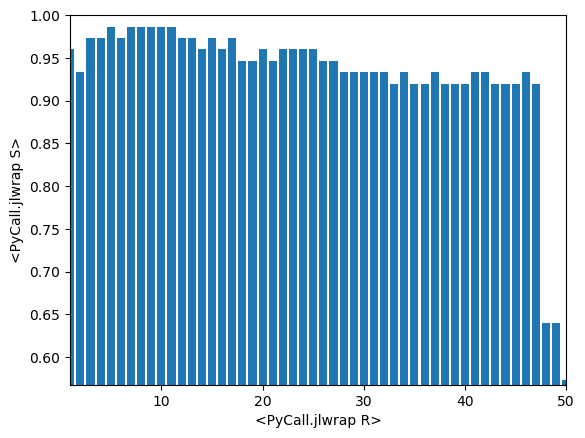

In [21]:
include("NtSolutions/ml_1_pca_nn/exo1.jl");

In [22]:
# Insert your code here.

__Exercise 2__

Display, as a function of the position in 2-D PCA space, the class output by
the $R$-NN method when applied in 2-D.
ounding boxes
est for different R

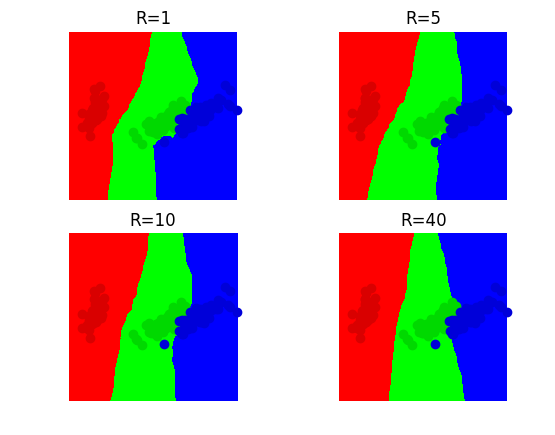

In [23]:
include("NtSolutions/ml_1_pca_nn/exo2.jl");

In [24]:
# Insert your code here.

Unsupervised Learning: $k$-means
----------------------------------
In an [un-supervised setting](https://en.wikipedia.org/wiki/Unsupervised_learning), the class information $y$ is not
available. The basic problem is then to recover class information from
the knowledge of $x$ only. This corresponds to the [clustering problem](https://en.wikipedia.org/wiki/Cluster_analysis).


Select a subset of classes

In [25]:
if k>=4
    ksvg = k; Xsvg = X; ysvg = y
    k = 3
    I = find(y.<=k)
    X = X(I,:); y = y(I)
    n = length(I)
end

PCA

In [26]:
U,D,V = svd(Xm(X),thin=true)
Z = Xm(X) * V;

The most basic algorithm is the <https://en.wikipedia.org/wiki/K-means_clustering $k$-means>, which tries to recover the
class index $\bar y_i=\ell$ from the distance $ \norm{x_i-c_\ell} $
between the feature point $x_i$ and the class centroid $c_\ell$
(which are the unknown of the problem).


It does so by minimizing the following non-convex energy
  $$ \umin{ (c_\ell)_\ell } \sum_i \umin{\ell} \norm{x_i-c_\ell}^2   $$


We first initialize the class centroids $ (c_\ell)_\ell $ at random among the points.
They are stored in as the row of a matrix $ C \in \RR^{k \times p} $.

In [27]:
I = randperm(n); I = I[1:k]
C = X[I,:];

The $k$-means algorithm iterate between first determining the class of
each point using the distance to the centroids
  $$ \forall i \in \{1,\ldots,n\}, \quad \bar y_i \leftarrow
          \uargmin{\ell} \norm{x_i-c_\ell}. $$

In [28]:
D = distmat(X,C)
yb = mapslices(indmin,D, 2);

Display the centroids and the classes using colors.
This corresponds to a Voronoi diagram segmentation in the high
dimensional space, but here the display is done in 2D.

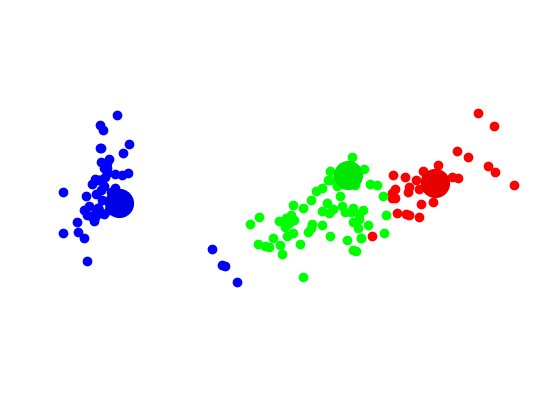

In [29]:
for i=1:k
    I = find(yb.==i);
    plot(Z[I,1], Z[I,2], ".", c=col[:,i], ms=12)#, 'Color', col(:,i), 'MarkerSize', 25);
end
CV = (C-repeat(mean(X,1), outer=(k,1)))*V;
for i=1:k
    plot(CV[i,1], CV[i,2], "o", c= col[:,i]*0.9,ms=20)#, markedgecolor ='k');
end
axis("tight"); axis("equal"); axis("off");

The second step of the $k$-means algorithm is to update the centroids
position to be the mean of the points inside each class
 $$ \forall \ell \in \{1,\ldots,k\}, \quad c_\ell \leftarrow
      \frac{ \sum_{i:y_i=\ell} x_i }{ \sharp \{i:y_i=\ell\} }. $$

In [30]:
for l=1:k
    C[l,:] = mean(X[find(yb.==l),:], 1)
end

__Exercise 3__

Peform several step of the $k$-means algorithm.
nit

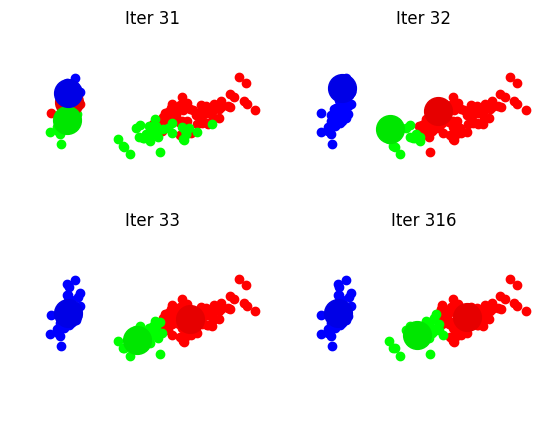

In [31]:
include("NtSolutions/ml_1_pca_nn/exo3.jl");

In [32]:
# Insert your code here.

Display the histogram of (true, i.e. according to $y$) class  inside
each estimated class (i.e. according to $\bar y$).

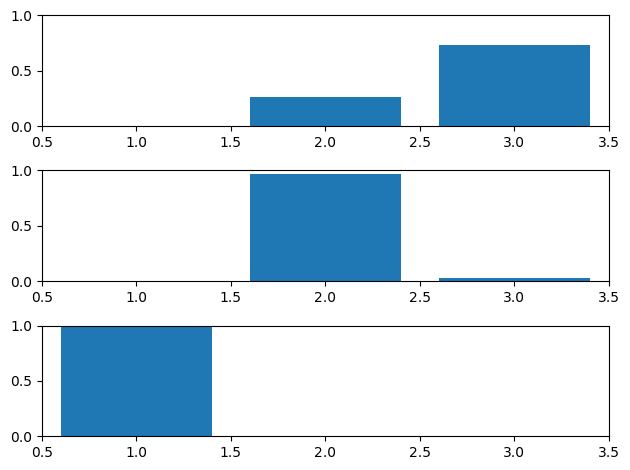

In [33]:
for l=1:k
    I = find(yb.==l)
    h = custom_hist(y[I]); h = h/sum(h)
    subplot(k,1,l)
    bar(1:k,h)
    axis([0.5, k+.5, 0, 1])
#    set(gca, 'FontSize', 10)
end
tight_layout()

__Exercise 4__

Implement better initialization strategies such as farthest point sampling or
<https://en.wikipedia.org/wiki/K-means%2B%2B $k$-means++>.

In [34]:
include("NtSolutions/ml_1_pca_nn/exo4.jl");

In [35]:
# Insert your code here.

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>